In [2]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df=load_breast_cancer()

##Independent Feature

x=pd.DataFrame(df.data,columns=df.feature_names)


In [45]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
##Dependent Feature

y=pd.DataFrame(df['target'],columns=["Target"])
y


,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [47]:
y['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [50]:
## Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [51]:
params=[{'C':[1,5,10]},{'max_iter':[100,150]}]

In [52]:
model1=LogisticRegression(C=100,max_iter=100)

In [53]:
model=GridSearchCV(model1,params,scoring='f1',cv=5)

In [54]:
model.fit(x_train,y_train)

C:\Users\WRICK GUHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WRICK GUHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\WRICK GUHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [55]:
model.best_params_

{'max_iter': 150}

In [56]:
model.best_score_

0.9558624887109136

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve

In [87]:
print("Confusion Matrix")
cnf=confusion_matrix(y_test,y_pred)
print(cnf)

Confusion Matrix
[[ 64   3]
 [  3 118]]


In [88]:
print("Accuracy Score")
accuracy_score(y_test,y_pred)

Accuracy Score


0.9680851063829787

In [89]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



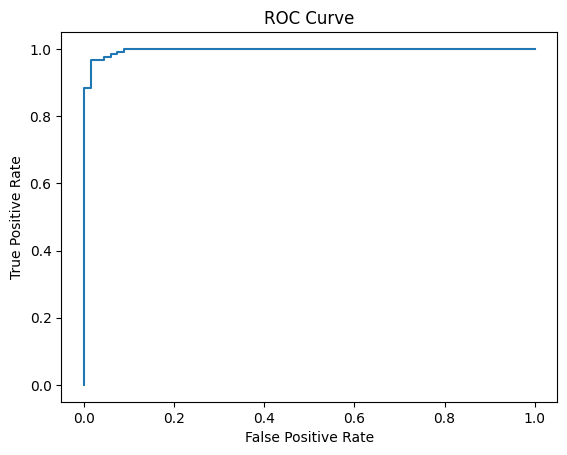

In [62]:
y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

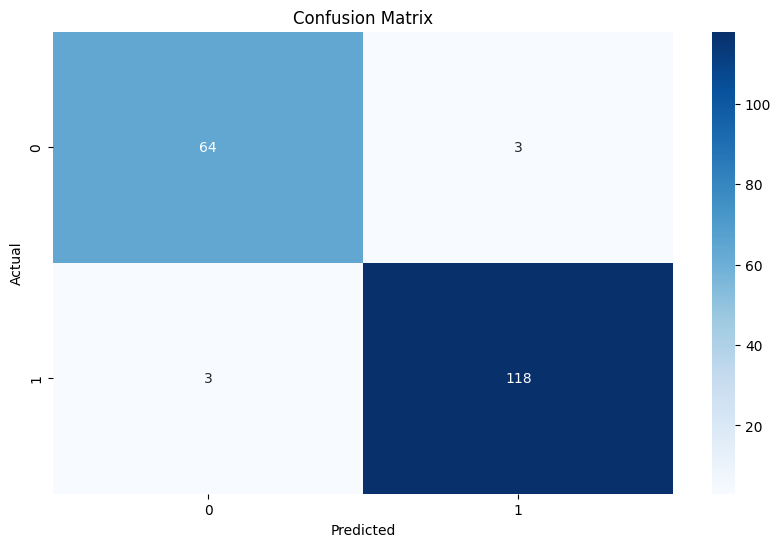

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(cnf,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()